In [1]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

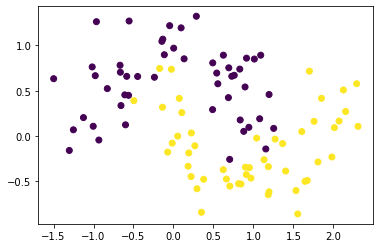

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

3888/3888 [==============================] - 9s 2ms/step


TypeError: ignored

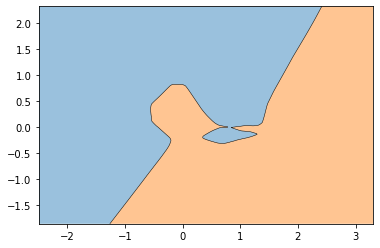

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

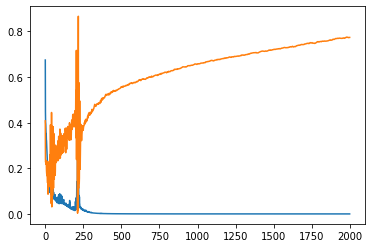

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
# L2 Regularization

model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

3888/3888 [==============================] - 8s 2ms/step


TypeError: ignored

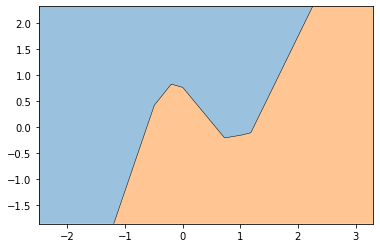

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

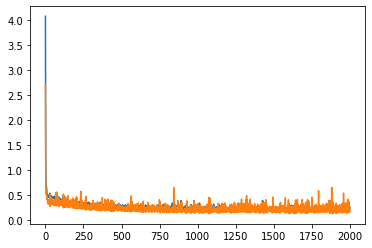

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])


In [12]:
# this show almost close there is no :- overfitting case:-

In [13]:
model1.get_weights()[0].shape   # 2,128  

(2, 128)

In [20]:
model1.get_weights()[0].reshape(256)

array([ 6.27460405e-02,  2.16967091e-01,  2.80794382e-01,  2.98040748e-01,
        2.44729549e-01, -4.14937913e-01,  1.64351642e-01,  2.65740842e-01,
        2.81548321e-01, -5.85472763e-01, -5.85494101e-01, -5.56282818e-01,
       -2.32170910e-01, -5.13126493e-01,  1.84725270e-01,  9.65222865e-02,
        2.27881506e-01, -3.95170636e-02,  2.50471920e-01, -3.81812990e-01,
       -5.27278006e-01,  5.37258871e-02, -2.06770614e-01,  3.12302679e-01,
       -4.89198029e-01, -5.64568281e-01,  8.75187442e-02,  2.63363987e-01,
        2.55712152e-01,  3.00526232e-01,  1.32390529e-01,  2.83845901e-01,
        2.87433535e-01, -4.35796648e-01,  2.37306487e-02,  2.09812145e-03,
        4.06838320e-02, -5.02378009e-02, -6.27394140e-01, -3.99028569e-01,
        2.40600660e-01, -5.66339903e-02, -4.84618366e-01,  8.70007053e-02,
        3.64815593e-02,  2.38907095e-02, -4.14261729e-01,  2.38767788e-01,
        4.08364743e-01,  2.49974936e-01, -2.87758619e-01,  2.97568381e-01,
        5.56319021e-02,  

In [14]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)  # layer 1 all weights 
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

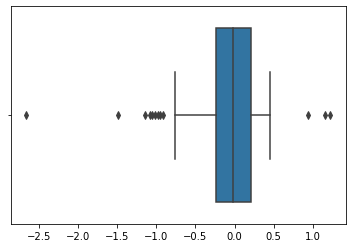

In [15]:
sns.boxplot(model1_weight_layer1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

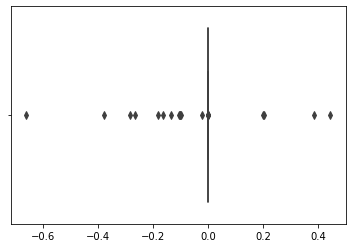

In [16]:
sns.boxplot(model2_weight_layer1)

In [17]:
# in this we use the l2 regularization in which it take all the weights near to 0

In [18]:
model1_weight_layer1.min()

-2.6702642

In [19]:
model2_weight_layer1.min()    # near to 0

-0.66286737

In [21]:
# For L1 Regularization

model3 = Sequential()

model3.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model3.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [23]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history3 = model3.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

3888/3888 [==============================] - 11s 3ms/step


TypeError: ignored

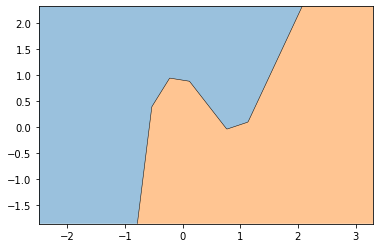

In [24]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

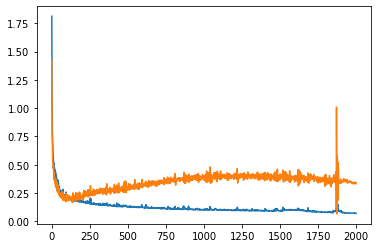

In [25]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [26]:
# in case it show differ more than l2

In [27]:
model3.get_weights()[0].shape

(2, 128)

In [28]:
model3_weight_layer1 = model3.get_weights()[0].reshape(256)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

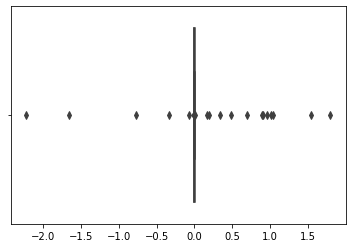

In [29]:
sns.boxplot(model3_weight_layer1)

In [30]:
model3_weight_layer1.min()

-2.2246616

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


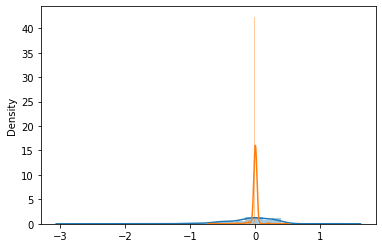

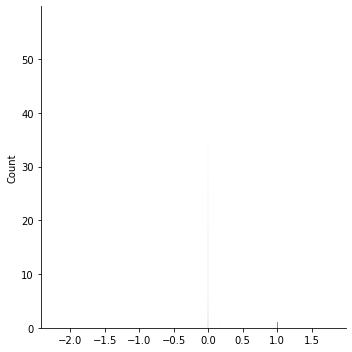

In [31]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)
sns.displot(model3_weight_layer1)